In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#specify the model + parameters 
beta = 0.9

def utility(x,d):
    if d == 0:
        return -x
    if d == 1:
        return -4 

# new stuff! defining transition probability matrix 
P = {0: np.array([
        [0.7, 0.3, 0.0],  # from x = 0 if d = 0 (continue)
        [0.0, 0.6, 0.4],  # from x = 1 if d = 0
        [0.0, 0.0, 1.0]   # from x = 2 if d = 0
    ]),
    1: np.array([
        [1.0, 0.0, 0.0],  # from x = 0 if d = 1 (repair)
        [1.0, 0.0, 0.0],  # from x = 1 if d = 1
        [1.0, 0.0, 0.0]   # from x = 2 if d = 1
    ])}  
#stochastic expectation of value function
def expected_value(x,d,V,P):
    return np.dot(P[d][x],V)  



In [49]:
V = np.zeros(3)

def iteration(V):
    last_one = V.copy()
    for i in range(3): #iterating over states
        v1 = np.exp(utility(i,1) + beta*expected_value(i,1,last_one,P) )
        v0 = np.exp(utility(i,0) + beta*expected_value(i,0,last_one,P) )
        V[i] = np.log(v1 + v0)


In [50]:
distance = 1
distance_record = []
first, second, third= [],[],[]

while distance > 0.000001:
    first.append(V[0])
    second.append(V[1])
    third.append(V[2])
    last_one = V.copy()
    iteration(V)
    distance = sum(abs(last_one - V))
    distance_record.append(distance)


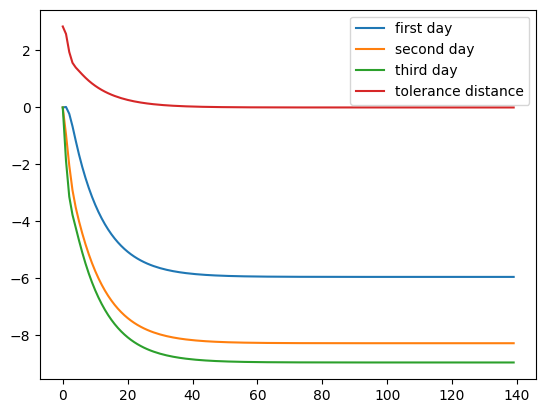

[-5.9462529  -8.27359883 -8.9493718 ]


In [51]:
#graphing out the movement of the values to show that it converges 
x = np.arange(len(first))  

plt.plot(x,first, label='first day')
plt.plot(x,second, label='second day')
plt.plot(x,third, label='third day')
plt.plot(x,distance_record, label='tolerance distance')
plt.legend()
plt.show()

print(V)
#this shows that the value function actually converges 

In [ ]:
# Now we go next to arrive at the likelihood function 

